In [5]:
pip install qrcode[pil] pandas matplotlib


     ---------------------------------------- 0.0/114.6 kB ? eta -:--:--
     --- ------------------------------------ 10.2/114.6 kB ? eta -:--:--
     --------- --------------------------- 30.7/114.6 kB 640.0 kB/s eta 0:00:01
     ------------- ----------------------- 41.0/114.6 kB 487.6 kB/s eta 0:00:01
     -----------------------------------  112.6/114.6 kB 819.2 kB/s eta 0:00:01
     ------------------------------------ 114.6/114.6 kB 606.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.2/8.1 MB 6.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/8.1 MB 11.7 MB/s eta 0:00:01
   ----------- ---------------------------- 2.4/8.1 MB 17.0 MB/s eta 0:00:01
   -------------------- ------------------- 4.1/8.1 MB 21.7 MB/s eta 0:00:01
   --------------------------- ------------ 5.7/8.1 MB 24.2 MB/s eta 0:00:01
   ------------------------------------- -- 7.7/8.1 MB 29.0 MB/s eta 0:00:01
   


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import qrcode
import pandas as pd
import os

# Read the CSV file
df = pd.read_csv('test_program.csv')  # Replace 'your_file.csv' with your CSV file name

# Create output directory if it doesn't exist
if not os.path.exists('qr_codes'):
    os.makedirs('qr_codes')

# Generate QR code for each row in the CSV
for index, row in df.iterrows():
    # Convert row data to string
    data = str(row.to_dict())
    
    # Create QR code instance
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    
    # Add data to QR code
    qr.add_data(data)
    qr.make(fit=True)
    
    # Create image from QR code
    qr_image = qr.make_image(fill_color="black", back_color="white")
    
    # Save the image
    qr_image.save(f'qr_codes/qr_code_{index}.png')

print("QR codes have been generated successfully!")

QR codes have been generated successfully!


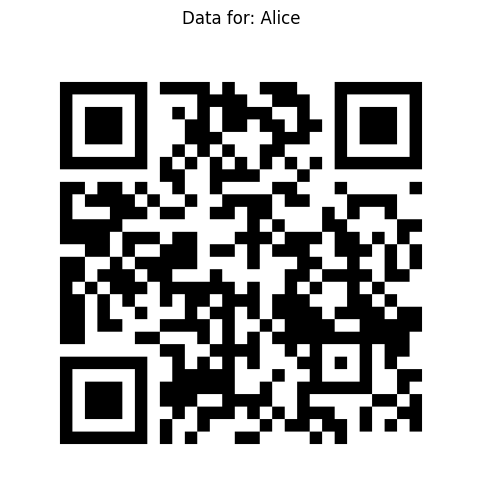

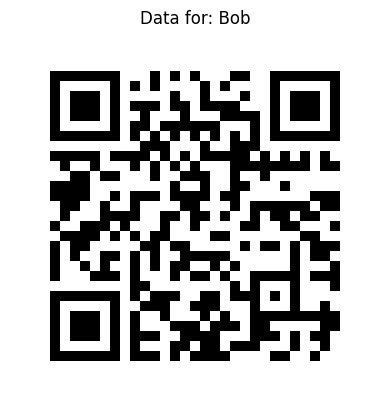

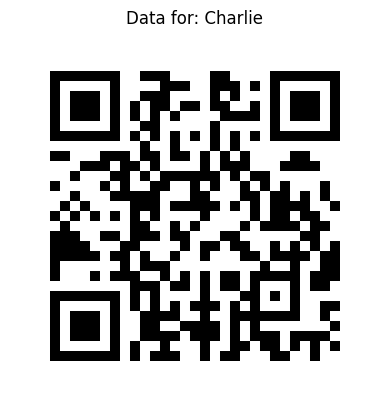

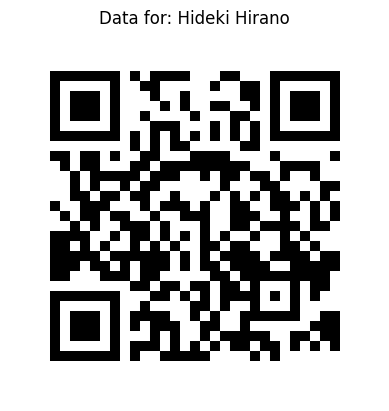

In [6]:
from PIL import Image
import time
from IPython.display import clear_output

import matplotlib.pyplot as plt

def display_qr_codes_animation(output_dir='qr_codes', delay=1):
    """
    Display QR codes in an animated sequence
    
    Args:
        output_dir: directory containing QR codes
        delay: time between frames in seconds
    """
    plt.ion()  # Enable interactive mode
    fig = plt.figure(figsize=(6, 6))
    
    # Get all QR code images
    for i in range(len(df)):
        qr_path = f'{output_dir}/qr_code_{i}.png'
        img = Image.open(qr_path)
        
        # Clear previous image
        plt.clf()
        
        # Display current QR code
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Data for: {df.iloc[i]["name"]}')
        
        # Update display
        plt.pause(delay)
        
    plt.ioff()
    plt.show()

# Display the animation
display_qr_codes_animation()
